In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

triads = [['BPS'+str(i),'BPS'+str(i+20),'BPS'+str(i+40)] for i in range(1,21)]


#import series, add datetimeindex
from adtk.data import validate_series
df=pd.read_csv('LFC Bad data/LFC_Bad_3.csv')
dti=pd.date_range('00:00:00', periods= len(df), freq= "1S")
df.set_index(dti, inplace=True)
df=validate_series(df)

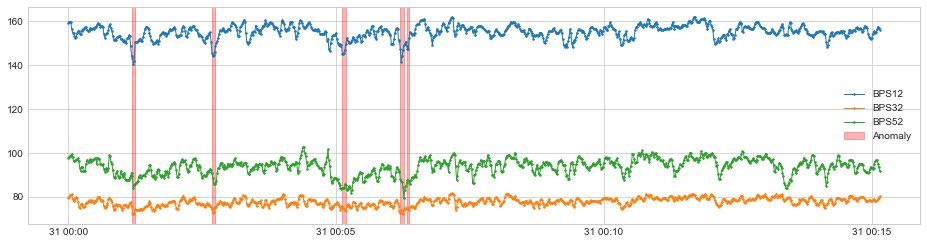

In [22]:
s=df[triads[11]]
from adtk.detector import MinClusterDetector
from adtk.visualization import plot as ad_plot
from sklearn.cluster import KMeans
min_cluster_detector = MinClusterDetector(KMeans(n_clusters=9))
anomalies = min_cluster_detector.fit_detect(s)
ad_plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

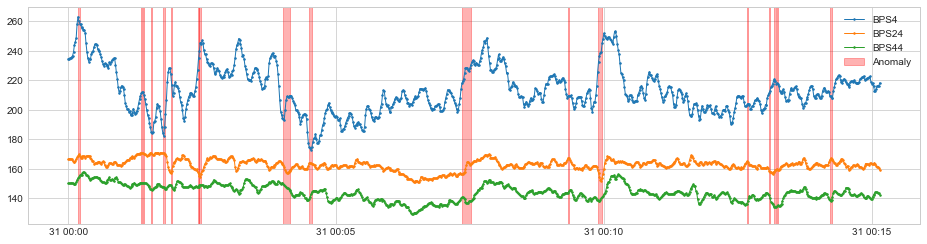

In [10]:
from adtk.detector import OutlierDetector
from sklearn.neighbors import LocalOutlierFactor
outlier_detector = OutlierDetector(LocalOutlierFactor(contamination=0.05))
anomalies = outlier_detector.fit_detect(s)
ad_plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

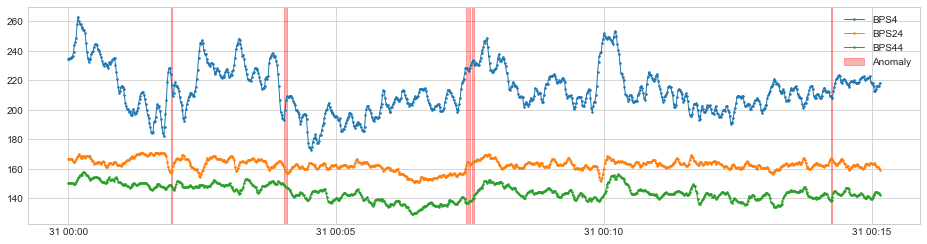

In [18]:
from adtk.detector import RegressionAD
from sklearn.linear_model import LinearRegression
regression_ad = RegressionAD(regressor=LinearRegression(), target=triads[3][2], c=1.5)
anomalies = regression_ad.fit_detect(s)
ad_plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.3, curve_group='all');

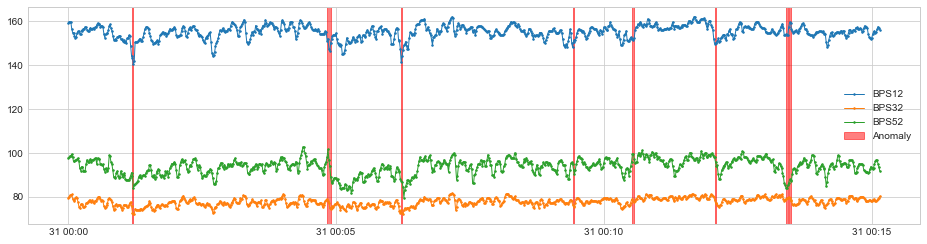

In [24]:
from adtk.detector import PcaAD
pca_ad = PcaAD(k=1)
anomalies = pca_ad.fit_detect(s)
ad_plot(s, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red', anomaly_alpha=0.5, curve_group='all');